In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv("../data/heart_disease_cleaned.csv")

print("Shape:", df.shape)
df.head()

Shape: (303, 22)


,age,trestbps,chol,thalach,oldpeak,target,target_bin,sex_1.0,cp_2.0,cp_3.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,True,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,1,True,False,False,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,1,True,False,False,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,True,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,0,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [2]:
X = df.drop(columns=["target", "target_bin"])
y = df["target_bin"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (303, 20)
Target shape: (303,)


In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (303, 20)
Transformed shape: (303, 20)


In [4]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26729601, 0.15739247, 0.1215409 , 0.10798331, 0.06963363,
       0.04799615, 0.03486964, 0.03261602, 0.02825356, 0.02517682,
       0.02235044, 0.01881878, 0.01744497, 0.01509823, 0.01211682,
       0.00666522, 0.0059575 , 0.00437641, 0.00281508, 0.00159804])

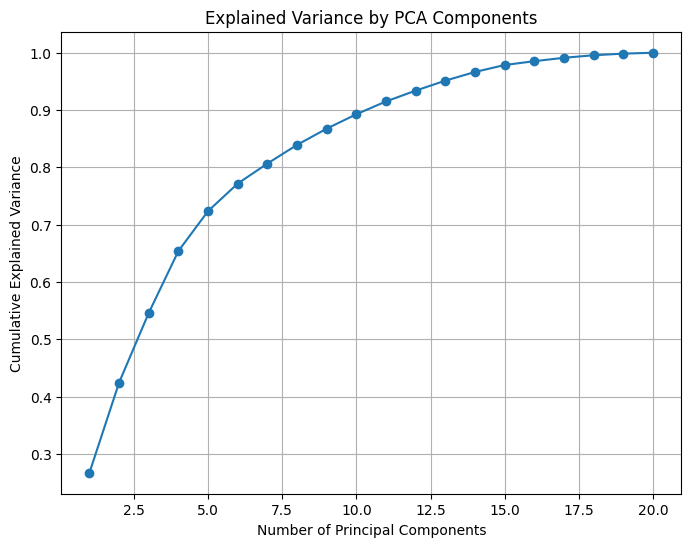

In [5]:
#  Plot cumulative variance to decide optimal components
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [6]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape (95% variance):", X_pca_95.shape)


Original shape: (303, 20)
Reduced shape (95% variance): (303, 13)


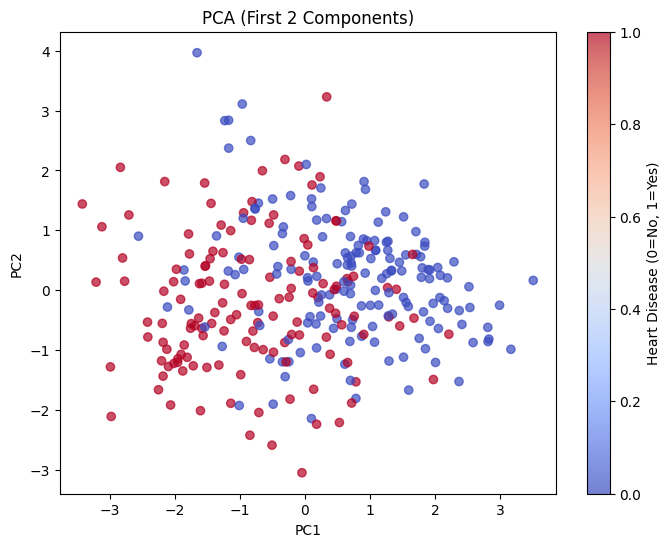

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_95[:,0], X_pca_95[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (First 2 Components)")
plt.colorbar(label="Heart Disease (0=No, 1=Yes)")
plt.show()

In [ ]:
pca_df = pd.DataFrame(X_pca_95, columns=[f"PC{i+1}" for i in range(X_pca_95.shape[1])])
pca_df["target_bin"] = y.values

pca_df.to_csv("../data/heart_disease_pca.csv", index=False)
print(" PCA-transformed dataset saved to /data/heart_disease_pca.csv")

✅ PCA-transformed dataset saved to /data/heart_disease_pca.csv
